joining positive and negative sets

In [192]:
import pandas as pd
bad = pd.read_csv('climate_enemies.csv')
good = pd.read_csv('climate_friends.csv')
df = bad.append(good)
df = df.reset_index(drop=True)
df.shape

(46056, 16)

creating dummies for categorical variables

In [193]:
df2 = pd.get_dummies(df, columns=['gender', 'race_census_2010', 'urban_rural', 'region', 'division'])
#df.columns.tolist()
#df.drop(columns= ['Unnamed: 0','committee_name','contributor_employer','contributor_occupation','fec_election_type_desc','gender','race'])


In [194]:
df3 = df2.drop(columns= ['last_donation_month', 'Unnamed: 0','committee_name','contributor_employer','contributor_occupation','fec_election_type_desc','race'])

select optimal variables

In [195]:
df3
y= df3.climate_donor.tolist()
df1 = df3.drop(columns='climate_donor')
df1_vars=df1.columns.values.tolist()
X= df1_vars

df3.shape

(46056, 26)

In [199]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)
rfe = rfe.fit(df2[X], y)

print(rfe.support_)
print(rfe.ranking_)

/Users/schuylerkarr/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/schuylerkarr/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

[False False False False False False False False False  True  True  True
  True  True  True False False False False  True  True  True False False
  True]
[15 12 14  7 10  5  9  4 16  1  1  1  1  1  1 11  3  2  6  1  1  1  8 13
  1]


Using chosen variables, entering into a ML algorithms

In [221]:
10, 11, 12, 13, 14, 15, 17, 18, 20, 21, 22, 25, 
9, 10, 11, 12, 13, 14, 16, 19, 20, 21, 24

reduced = df3.iloc[:, [4, 5, 9, 10, 11, 12, 13, 14, 16, 19, 20, 21, 24]]
reduced
y = df['climate_donor']
df3_drop = df3.drop(columns='climate_donor')
X = df3_drop

In [222]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

kfold = model_selection.KFold(n_splits=10)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

Logistic regression accuracy: 0.691
Random Forest Accuracy: 0.717
Support vector machine accuracy: 0.600
10-fold cross validation average accuracy: 0.711
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      8225
           1       0.67      0.59      0.63      5592

    accuracy                           0.72     13817
   macro avg       0.71      0.70      0.70     13817
weighted avg       0.71      0.72      0.71     13817



/Users/schuylerkarr/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


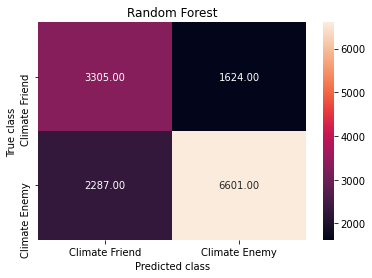

In [223]:
y_pred = rf.predict(X_test)

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Climate Friend", "Climate Enemy"] , yticklabels = ["Climate Friend", "Climate Enemy"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

calculating feature importance

In [227]:
import numpy as np
feature_labels = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))
df3

8-0.00%
17-0.17%
23-0.21%
6-0.24%
5-0.41%
16-0.46%
22-0.52%
7-0.60%
12-0.61%
19-0.66%
20-0.77%
4-0.83%
9-0.85%
3-0.86%
24-0.91%
15-0.92%
14-2.39%
21-2.45%
18-2.47%
13-4.17%
10-4.39%
11-5.78%
1-12.44%
0-26.61%
2-30.31%


,total_contribution,unique_contributions,average_contribution,climate_donor,gender_female,gender_male,race_census_2010_api,race_census_2010_black,race_census_2010_hispanic,race_census_2010_nh_white,...,region_West,division_East North Central,division_East South Central,division_Middle Atlantic,division_Mountain,division_New England,division_Pacific,division_South Atlantic,division_West North Central,division_West South Central
0,0.0,2,0.00,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,45.0,2,22.50,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,150.0,1,150.00,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,250.0,1,250.00,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,200.0,1,200.00,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46051,250.0,1,250.00,1,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
46052,97.5,5,19.50,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
46053,182.5,3,60.83,1,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
46054,250.0,1,250.00,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


testing another way of implementing many ML models at once

In [228]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y_train, scoring = "accuracy", cv = kfold, n_jobs=4))



/Users/schuylerkarr/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.74      0.80      0.77      8225
           1       0.67      0.59      0.63      5592

    accuracy                           0.72     13817
   macro avg       0.71      0.70      0.70     13817
weighted avg       0.71      0.72      0.71     13817



,CrossValMeans,CrossValerrors,Algorithm
0,0.607990,0.004506,SVC
1,0.702813,0.005649,DecisionTree
2,0.706287,0.003595,AdaBoost
3,0.712274,0.006366,RandomForest
4,0.705264,0.007714,ExtraTrees
5,0.750426,0.006721,GradientBoosting
6,0.675734,0.064478,MultipleLayerPerceptron
7,0.691088,0.010511,KNeighboors
8,0.698223,0.005806,LogisticRegression
9,0.706598,0.007666,LinearDiscriminantAnalysis


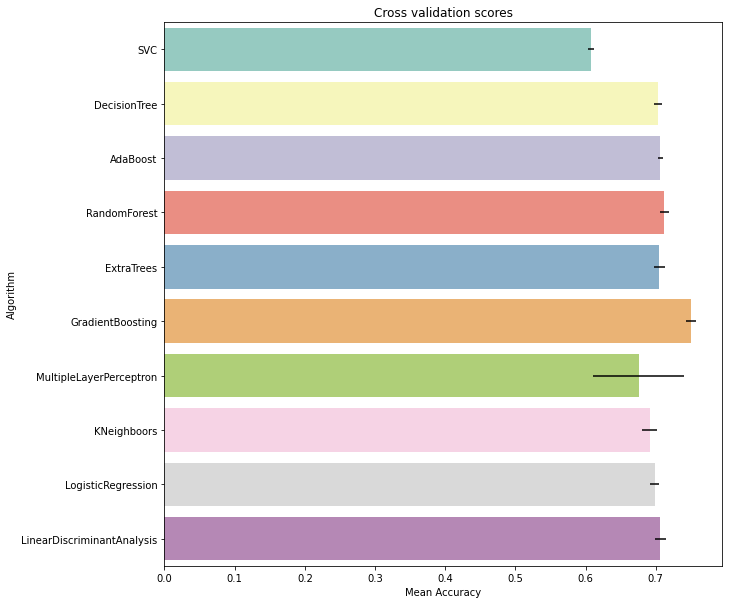

In [229]:
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = plt.figure(figsize=(10, 10))
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

print(classification_report(y_test, rf.predict(X_test)))
cv_res